In [3]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [4]:
df = pd.read_csv('/content/Jan_to_Dec.csv',parse_dates=["date"],dayfirst=True)
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Jan_to_Dec.csv'

In [7]:
df

,date,time,mcp
0,2021-01-01,00:00,2301.03
1,2021-01-01,00:15,2300.12
2,2021-01-01,00:30,2298.10
3,2021-01-01,00:45,2243.24
4,2021-01-01,01:00,2131.71
...,...,...,...
35055,2021-12-31,23:15,1999.99
35056,2021-12-31,23:30,1999.85
35057,2021-12-31,23:45,1999.58
35058,2021-12-31,23:45,1999.58


In [8]:
from datetime import datetime,date,time

In [9]:
for i in range(0,df['time'].size):
    df.loc[i,'time']=datetime.strptime(df.loc[i,'time'], '%H:%M').time()

In [10]:
for i in range (0,df['time'].size) :
    df.loc[i,'days']=pd.Timestamp.combine((df.loc[i,'date']),(df.loc[i,'time']))

In [11]:
df

,date,time,mcp,days
0,2021-01-01,00:00:00,2301.03,2021-01-01 00:00:00
1,2021-01-01,00:15:00,2300.12,2021-01-01 00:15:00
2,2021-01-01,00:30:00,2298.10,2021-01-01 00:30:00
3,2021-01-01,00:45:00,2243.24,2021-01-01 00:45:00
4,2021-01-01,01:00:00,2131.71,2021-01-01 01:00:00
...,...,...,...,...
35055,2021-12-31,23:15:00,1999.99,2021-12-31 23:15:00
35056,2021-12-31,23:30:00,1999.85,2021-12-31 23:30:00
35057,2021-12-31,23:45:00,1999.58,2021-12-31 23:45:00
35058,2021-12-31,23:45:00,1999.58,2021-12-31 23:45:00


In [12]:
df=df[["days","mcp"]]
df

,days,mcp
0,2021-01-01 00:00:00,2301.03
1,2021-01-01 00:15:00,2300.12
2,2021-01-01 00:30:00,2298.10
3,2021-01-01 00:45:00,2243.24
4,2021-01-01 01:00:00,2131.71
...,...,...
35055,2021-12-31 23:15:00,1999.99
35056,2021-12-31 23:30:00,1999.85
35057,2021-12-31 23:45:00,1999.58
35058,2021-12-31 23:45:00,1999.58


In [13]:
type(df['days'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df=df.set_index('days')

In [15]:
df=df.resample('1H').mean()

In [16]:
df.to_csv('/content/Jan_to_Dec_prophet.csv')

In [17]:
df=pd.read_csv('/content/Jan_to_Dec_prophet.csv')

In [18]:
df

,days,mcp
0,2021-01-01 00:00:00,2285.6225
1,2021-01-01 01:00:00,2097.2125
2,2021-01-01 02:00:00,2008.1925
3,2021-01-01 03:00:00,2008.3225
4,2021-01-01 04:00:00,2038.7250
...,...,...
8755,2021-12-31 19:00:00,4325.2825
8756,2021-12-31 20:00:00,3707.3575
8757,2021-12-31 21:00:00,3012.5650
8758,2021-12-31 22:00:00,2531.9625


In [19]:
df.columns = ['ds','y']

In [20]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()
     

,ds,y
8755,2021-12-31 19:00:00,4325.2825
8756,2021-12-31 20:00:00,3707.3575
8757,2021-12-31 21:00:00,3012.5650
8758,2021-12-31 22:00:00,2531.9625
8759,2021-12-31 23:00:00,2016.4550


<Axes: xlabel='ds'>

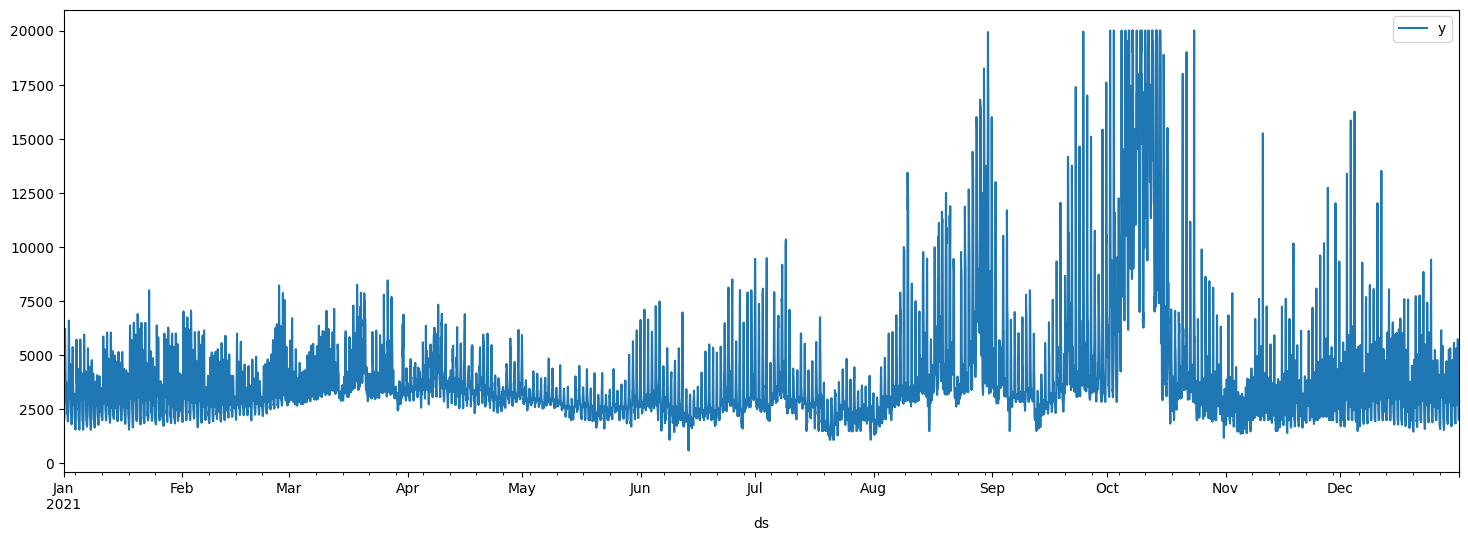

In [21]:
df.plot(x='ds',y='y',figsize=(18,6))

In [22]:
len(df)

8760

In [23]:
test = df.iloc[len(df)-876:]

In [24]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1,freq='H') #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpid1n6o57/i5ls12yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpid1n6o57/nlw8qt6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65506', 'data', 'file=/tmp/tmpid1n6o57/i5ls12yj.json', 'init=/tmp/tmpid1n6o57/nlw8qt6f.json', 'output', 'file=/tmp/tmpid1n6o57/prophet_modelctnk_ury/prophet_model-20230403182738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:00:00,2919.680000,782.916329,5357.741905,2919.680000,2919.680000,103.500990,103.500990,103.500990,78.821400,78.821400,78.821400,24.679590,24.679590,24.679590,0.0,0.0,0.0,3023.180990
1,2021-01-01 01:00:00,2920.275773,156.393917,5005.733243,2920.275773,2920.275773,-310.664083,-310.664083,-310.664083,-332.643794,-332.643794,-332.643794,21.979710,21.979710,21.979710,0.0,0.0,0.0,2609.611690
2,2021-01-01 02:00:00,2920.871547,-65.710692,4414.316730,2920.871547,2920.871547,-724.358978,-724.358978,-724.358978,-745.203371,-745.203371,-745.203371,20.844393,20.844393,20.844393,0.0,0.0,0.0,2196.512569
3,2021-01-01 03:00:00,2921.467320,-220.543363,4305.536345,2921.467320,2921.467320,-960.626607,-960.626607,-960.626607,-981.988244,-981.988244,-981.988244,21.361637,21.361637,21.361637,0.0,0.0,0.0,1960.840713
4,2021-01-01 04:00:00,2922.063094,-303.797588,4326.908351,2922.063094,2922.063094,-875.777851,-875.777851,-875.777851,-899.373932,-899.373932,-899.373932,23.596081,23.596081,23.596081,0.0,0.0,0.0,2046.285243


In [26]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8756,2021-12-31 20:00:00,4695.258058,2318.298095,6911.634683
8757,2021-12-31 21:00:00,4319.518118,1976.957319,6708.217951
8758,2021-12-31 22:00:00,3912.019886,1558.459202,6179.626103
8759,2021-12-31 23:00:00,3565.791240,1381.827555,5998.781305
8760,2022-01-01 00:00:00,3226.023661,984.384796,5510.079307


In [28]:
plot_plotly(m ,forecast)

In [29]:
plot_components_plotly(m, forecast)

In [30]:
from statsmodels.tools.eval_measures import rmse

In [33]:
predictions = forecast.iloc[-876:]['yhat']

In [34]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  1401.4018606031211
Mean Value of Test Dataset: 3542.6219800228314


In [37]:
from sklearn.metrics import mean_absolute_percentage_error
error=mean_absolute_percentage_error(test['y'],predictions)

In [38]:
print(error)

0.2699015020368684
